##Let's work with the wine dataset we worked with before, but slightly modified. This has more instances and different target features

####based on http://blog.yhathq.com/posts/classification-using-knn-and-python.html

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn import cross_validation
import numpy as np

In [65]:
df = pd.read_csv("data/wine.csv")

In [31]:
df.columns

Index([u'fixed_acidity', u'volatile_acidity', u'citric_acid',
       u'residual_sugar', u'chlorides', u'free_sulfur_dioxide',
       u'total_sulfur_dioxide', u'density', u'pH', u'sulphates', u'alcohol',
       u'quality', u'color', u'is_red', u'high_quality'],
      dtype='object')

###Instead of wine cultvar, we have the wine color (red or white), as well as a binary (is red) and high quality indicator (0 or 1)

In [39]:
df.high_quality.unique()

array([ 0.,  1.])

###Let's set up our training and test sets

In [42]:
train, test = cross_validation.train_test_split(df[['density','sulphates','residual_sugar','high_quality']],train_size=0.75)

###We'll use just three columns (dimensions) for classification

In [43]:
train

,density,sulphates,residual_sugar,high_quality
1556,0.99636,0.56,2.20,0
6201,0.99752,0.43,13.40,0
127,0.99640,0.48,1.80,0
2760,0.99980,0.38,16.85,0
3463,0.99400,0.61,2.40,0
5362,0.99084,0.37,2.70,0
5737,0.98949,0.39,1.50,0
922,0.99504,0.89,1.80,0
5456,0.99224,0.55,2.70,0
4265,0.98892,0.41,2.00,1


In [44]:
train = np.asarray(train)
train

array([[  0.99636,   0.56   ,   2.2    ,   0.     ],
       [  0.99752,   0.43   ,  13.4    ,   0.     ],
       [  0.9964 ,   0.48   ,   1.8    ,   0.     ],
       ..., 
       [  0.99564,   0.38   ,  12.55   ,   0.     ],
       [  0.99374,   0.59   ,   6.8    ,   0.     ],
       [  0.99432,   0.44   ,   6.8    ,   0.     ]])

In [45]:
test = np.asarray(test) 
test

array([[  1.0002 ,   0.38   ,  20.4    ,   0.     ],
       [  0.9986 ,   0.35   ,  15.55   ,   0.     ],
       [  0.9968 ,   0.51   ,   6.2    ,   0.     ],
       ..., 
       [  0.9941 ,   0.37   ,   7.     ,   1.     ],
       [  0.9932 ,   0.75   ,   1.4    ,   0.     ],
       [  0.99168,   0.43   ,   4.9    ,   0.     ]])

In [53]:
x_train = train[:,:3]
y_train = train[:,3]

In [54]:
x_test = test[:,:3]
y_test = test[:,3]

###Let's start with a k of 1 to predict high quality

In [55]:
clf = KNeighborsClassifier(n_neighbors=1)

In [57]:
clf.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=1, p=2, weights='uniform')

In [58]:
preds = clf.predict(x_test)

In [59]:
accuracy = np.where(preds==y_test, 1, 0).sum() / float(len(test))

In [60]:
print "Accuracy: %3f" % (accuracy,)

Accuracy: 0.806154


###Not bad. Let's see what happens as the k changes

Neighbors: 1, Accuracy: 0.806154
Neighbors: 3, Accuracy: 0.778462
Neighbors: 5, Accuracy: 0.776615
Neighbors: 7, Accuracy: 0.781538
Neighbors: 9, Accuracy: 0.789538
Neighbors: 11, Accuracy: 0.785231
Neighbors: 13, Accuracy: 0.793846
Neighbors: 15, Accuracy: 0.791385
Neighbors: 17, Accuracy: 0.790154
Neighbors: 19, Accuracy: 0.791385
Neighbors: 21, Accuracy: 0.787077
Neighbors: 23, Accuracy: 0.785846
Neighbors: 25, Accuracy: 0.787692
Neighbors: 27, Accuracy: 0.788923
Neighbors: 29, Accuracy: 0.789538
Neighbors: 31, Accuracy: 0.789538
Neighbors: 33, Accuracy: 0.785846
Neighbors: 35, Accuracy: 0.787077
Neighbors: 37, Accuracy: 0.790154
Neighbors: 39, Accuracy: 0.790769
Neighbors: 41, Accuracy: 0.788923
Neighbors: 43, Accuracy: 0.789538
Neighbors: 45, Accuracy: 0.789538
Neighbors: 47, Accuracy: 0.792000
Neighbors: 49, Accuracy: 0.792000


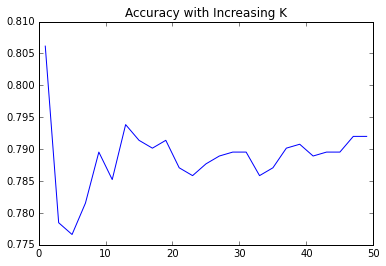

In [62]:
results = []
for k in range(1, 51, 2):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(x_train,y_train)
    preds = clf.predict(x_test)
    accuracy = np.where(preds==y_test, 1, 0).sum() / float(len(test))
    print "Neighbors: %d, Accuracy: %3f" % (k, accuracy)

    results.append([k, accuracy])

results = pd.DataFrame(results, columns=["k", "accuracy"])

plt.plot(results.k, results.accuracy)
plt.title("Accuracy with Increasing K")
plt.show()

###Looks like about 80% is the best we can do. The way it plateaus, suggests there's not much more to be gained by increasing k

###We can also tune this a bit by not weighting each instance the same, but decreasing the weight as the distance increases

Neighbors: 1, Accuracy: 0.806154
Neighbors: 3, Accuracy: 0.807385
Neighbors: 5, Accuracy: 0.816615
Neighbors: 7, Accuracy: 0.827077
Neighbors: 9, Accuracy: 0.828923
Neighbors: 11, Accuracy: 0.827077
Neighbors: 13, Accuracy: 0.832615
Neighbors: 15, Accuracy: 0.830769
Neighbors: 17, Accuracy: 0.832000
Neighbors: 19, Accuracy: 0.833231
Neighbors: 21, Accuracy: 0.836923
Neighbors: 23, Accuracy: 0.835692
Neighbors: 25, Accuracy: 0.836308
Neighbors: 27, Accuracy: 0.838154
Neighbors: 29, Accuracy: 0.840615
Neighbors: 31, Accuracy: 0.838769
Neighbors: 33, Accuracy: 0.838154
Neighbors: 35, Accuracy: 0.838769
Neighbors: 37, Accuracy: 0.838769
Neighbors: 39, Accuracy: 0.839385
Neighbors: 41, Accuracy: 0.839385
Neighbors: 43, Accuracy: 0.838769
Neighbors: 45, Accuracy: 0.839385
Neighbors: 47, Accuracy: 0.838769
Neighbors: 49, Accuracy: 0.840615


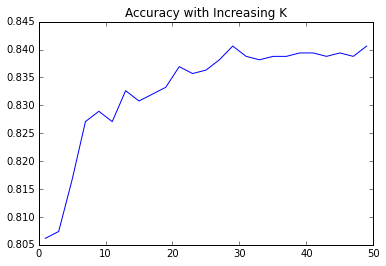

In [63]:
results = []
for k in range(1, 51, 2):
    clf = KNeighborsClassifier(n_neighbors=k,weights='distance')
    clf.fit(x_train,y_train)
    preds = clf.predict(x_test)
    accuracy = np.where(preds==y_test, 1, 0).sum() / float(len(test))
    print "Neighbors: %d, Accuracy: %3f" % (k, accuracy)

    results.append([k, accuracy])

results = pd.DataFrame(results, columns=["k", "accuracy"])

plt.plot(results.k, results.accuracy)
plt.title("Accuracy with Increasing K")
plt.show()

###This actually increases the accuracy of our prediction